# Supporting files `utils.py`#
> Methods for setting axes, saving, exporting to files

In [6]:
import matplotlib.pyplot as plt
plt.style.use("ilya_plot")

import utils

# Curvature at the flat regions `curvature.py` #
> - Generates parameters for the curvature in different papers

In [1]:
import curvature

In [2]:
zhu2010 = curvature.extract_curve_from_image(
        "data/zhu2010.png", [20, 100], [20, 100], [100, 250], [-0.01, 0.01], [2, 8]
    )

In [3]:
stern2014 = curvature.extract_curve_from_image(
        "data/stern2014.png", [230, 260], [0, 2], [0, 30], [-0.003, 0.003], [8.4, 9]
    )

In [4]:
gustavsson2012 = curvature.extract_curve_from_image(
        "data/gustavsson2012.png",
        [60, 140],
        [60, 120],
        [160, 180],
        [-0.005, 0.005],
        [2, 4],
    )

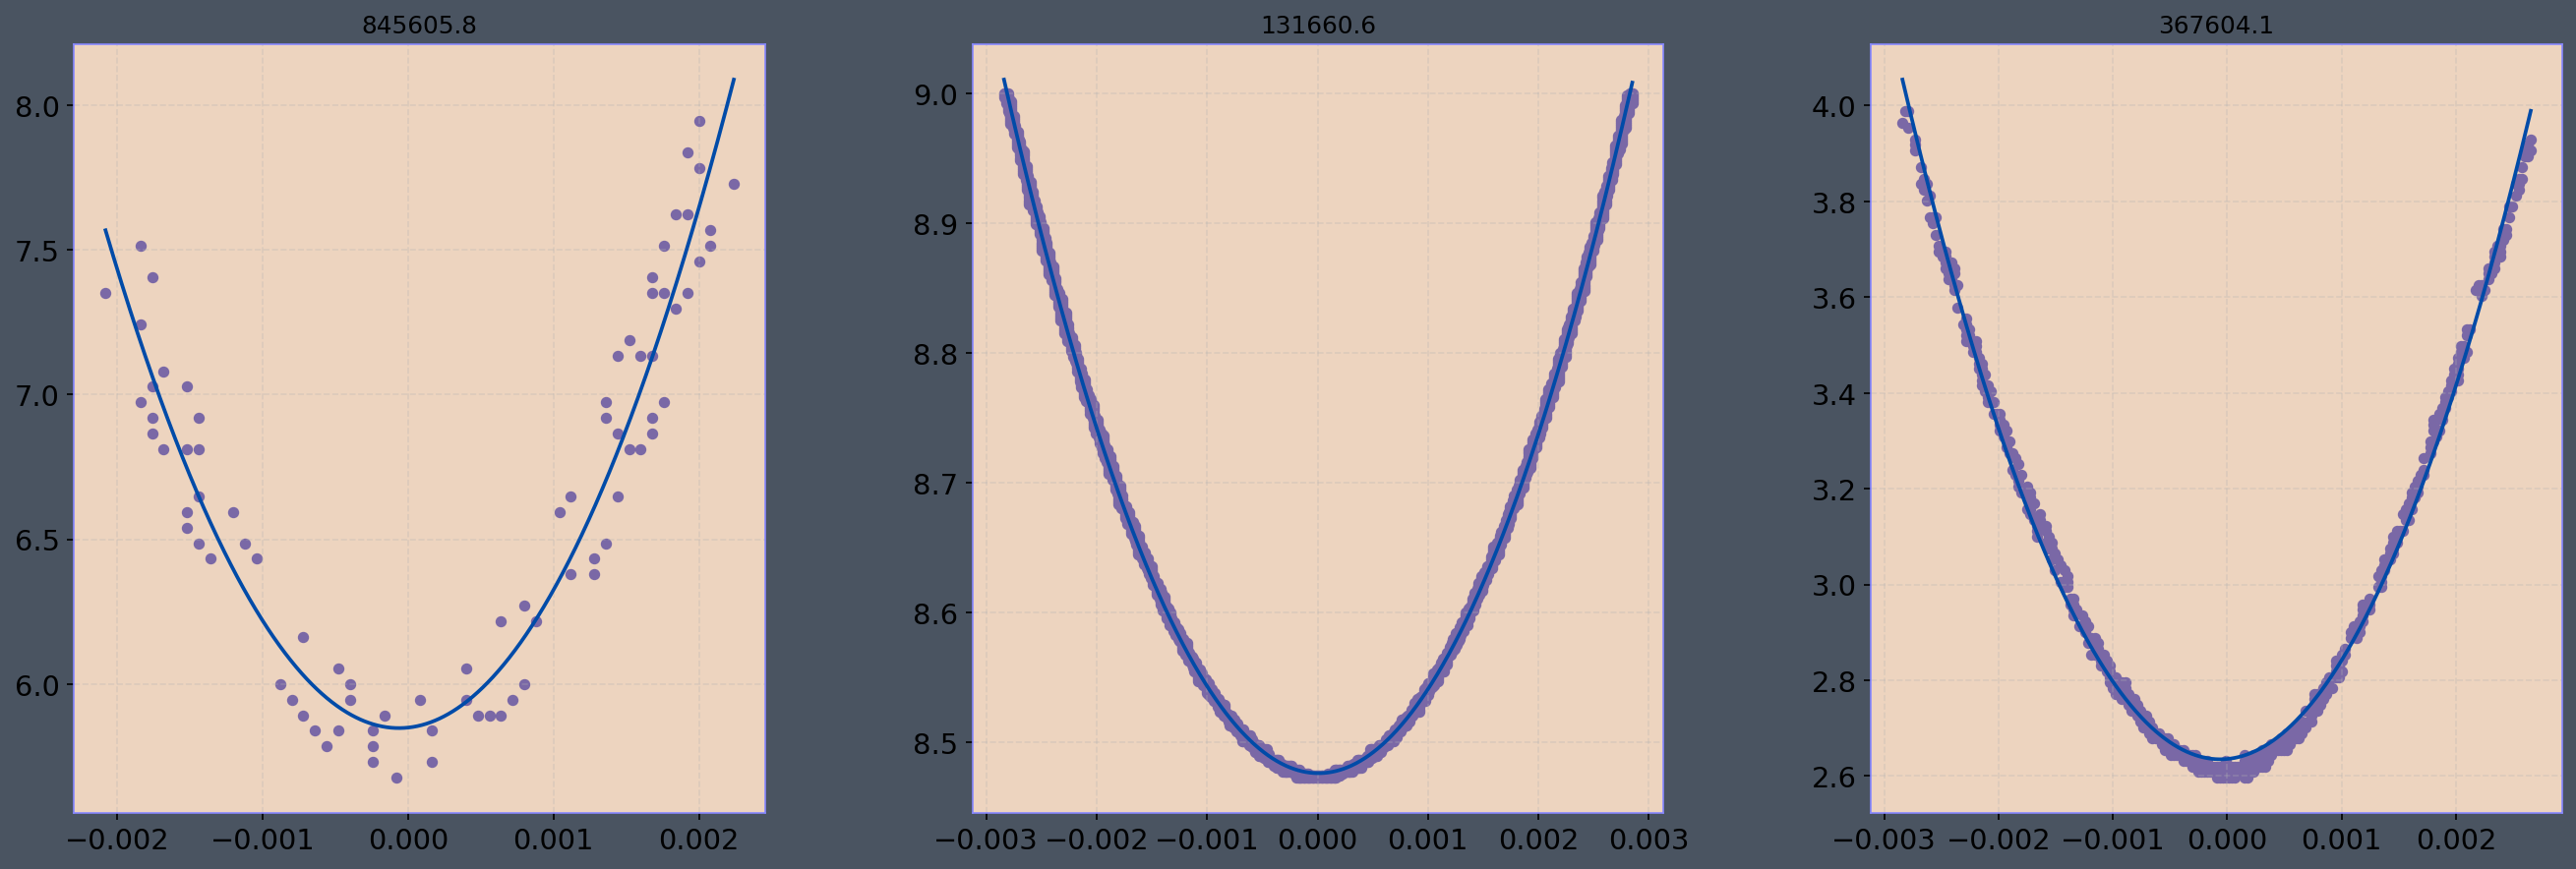

In [7]:
fig = plt.figure(figsize=(20, 7))
ax = fig.subplots(nrows=1, ncols=3)
curvature.fit_and_plot_parabolla(zhu2010, ax[0])
curvature.fit_and_plot_parabolla(stern2014, ax[1])
curvature.fit_and_plot_parabolla(gustavsson2012, ax[2])

# Rabi and Transmission plots `graph_analysis.py`#
> **Generates**
> - `fig2_transmission.svg`: fit to the transmission dip
> - `fig5_rabi.svg` oscillations

In [ ]:
import graph_analysis

# Fitting the spectrum
> Need to import the `TwinQubit` class

In [1]:
%matplotlib notebook
import logging

import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ilya_plot")

from quantum_builder import QuantumBuilder

qubit_parameters = {
    "alpha": 1.023,
    "assymetry": 1.011,
    "jj_squares": 2,
    "states_per_island": 17,
}
flux_list = np.linspace(0.3, 0.7, 100)

twin_qubit = QuantumBuilder.build_twin_qubit(qubit_parameters,
                                            flux_list,
                                            logging_level = logging.WARNING)
twin_qubit.override_parameters(
    EC = 13.5,
    EJ = 91
)
twin_qubit.run_simulation(False)

0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:10


> Plot the sparse matrix to make sure we build correctly

In [2]:
if qubit_parameters["states_per_island"] < 7:
    fig = plt.figure(figsize=(8, 5))
    ax = fig.subplots(nrows=1, ncols=1)
    twin_qubit.plot_sparse_matrix(ax)

> Plot transmission spectrum

<IPython.core.display.Javascript object>


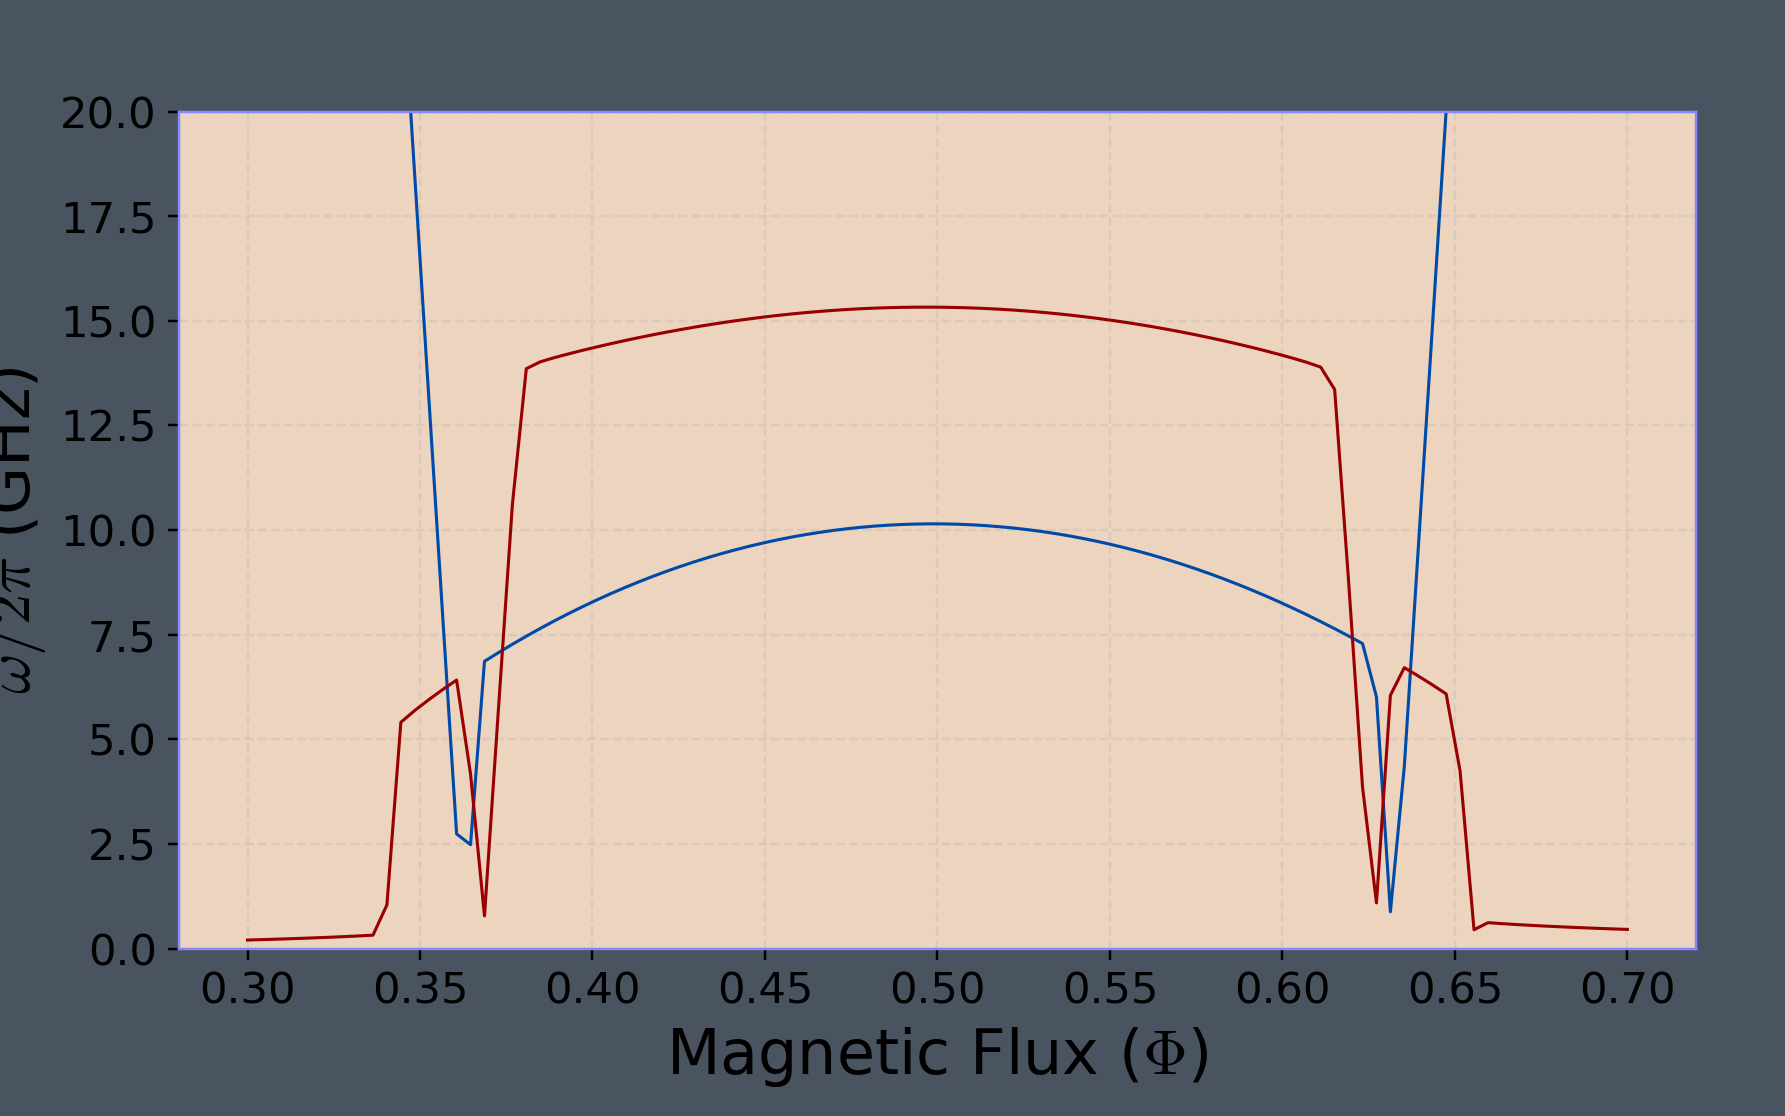

In [3]:
fig = plt.figure(figsize=(8, 5))
ax = fig.subplots(nrows=1, ncols=1)

ax.set_ylim([4, 20])
twin_qubit.plot_transitions(ax)
plt.show()

> Load up assymetric data to compare